In [6]:
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
url='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
urlretrieve(url, 'mpg_data_original.csv')

('mpg_data_original.csv', <http.client.HTTPMessage at 0x2c07cc11880>)

In [39]:
# re(정규표현식) => \s : 화이트스페이스
import pandas as pd
df=pd.read_csv('./mpg_data_original.csv','\s+', header=None)
df.head()

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3398: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       406 non-null    float64
 2   2       406 non-null    float64
 3   3       400 non-null    float64
 4   4       406 non-null    float64
 5   5       406 non-null    float64
 6   6       406 non-null    float64
 7   7       406 non-null    float64
 8   8       406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [41]:
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model year    406 non-null    float64
 7   origin        406 non-null    float64
 8   car name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [43]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [44]:
df['cylinders']=df['cylinders'].astype('category')
df['origin']=df['origin'].astype('category')
df['model year']=df['model year'].astype('category')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     406 non-null    category
 2   displacement  406 non-null    float64 
 3   horsepower    400 non-null    float64 
 4   weight        406 non-null    float64 
 5   acceleration  406 non-null    float64 
 6   model year    406 non-null    category
 7   origin        406 non-null    category
 8   car name      406 non-null    object  
dtypes: category(3), float64(5), object(1)
memory usage: 21.3+ KB


In [46]:
df[df['mpg'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
367,NaN,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


In [47]:
df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In [48]:
df=df.dropna().reset_index(drop=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [49]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [50]:
mpg_to_kpl = 1.60934/3.78541
df['kpl'] = df['mpg'] * mpg_to_kpl
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,7.652571
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,6.377143
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,7.652571
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,6.802286
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,7.227428
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,11.478857
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,18.706285
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,13.604571
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,11.904000


In [53]:
df=df.drop('mpg', axis=1)

In [54]:
df

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,7.652571
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,6.377143
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,7.652571
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,6.802286
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,7.227428
...,...,...,...,...,...,...,...,...,...
387,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,11.478857
388,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,18.706285
389,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,13.604571
390,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,11.904000


In [94]:
df.corr()

,displacement,horsepower,weight,acceleration,kpl
displacement,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.543800,-0.689196,-0.416839,1.000000,0.423329
kpl,-0.805127,-0.778427,-0.832244,0.423329,1.000000


In [58]:
import numpy as np
data=np.array(df.iloc[:,:7])
target=np.array(df['kpl'])

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [66]:
from sklearn.utils import all_estimators
models = all_estimators(type_filter='regressor')

# 경고무시
import warnings
warnings.filterwarnings('ignore')

s_n=[]

for name, model in models:
    
    # error 발생시 pass
    try:
        
        # 모델 객체 생성
        md=model()
        # print(name)
        # 학습
        md.fit(x_train, y_train)
        # 평가
        score=md.score(x_test, y_test)
                
        # 이름과 점수 리스트에 담기
        s_n.append((name, score)) # 이름과 점수 한번에 담기
        
    except:
        pass

s_n.sort(reverse=True,key= lambda x: x[1])

s_n


[('RandomForestRegressor', 0.8895281808902273),
 ('ExtraTreesRegressor', 0.879618839461036),
 ('HistGradientBoostingRegressor', 0.8697916523313121),
 ('BaggingRegressor', 0.8547409025290114),
 ('GradientBoostingRegressor', 0.8532368811170176),
 ('PoissonRegressor', 0.8253228897033833),
 ('AdaBoostRegressor', 0.8186825231297447),
 ('LarsCV', 0.8036994171400242),
 ('BayesianRidge', 0.801425337178936),
 ('RidgeCV', 0.8000121845627435),
 ('Ridge', 0.7990253547730501),
 ('LinearRegression', 0.7988908872869827),
 ('TransformedTargetRegressor', 0.7988908872869827),
 ('ElasticNet', 0.7937989795578697),
 ('LassoLarsCV', 0.792849944564352),
 ('OrthogonalMatchingPursuitCV', 0.7923119354438523),
 ('LassoLarsIC', 0.7915711847906287),
 ('KernelRidge', 0.7912027210787342),
 ('Lasso', 0.7886926672834599),
 ('HuberRegressor', 0.7864231033388392),
 ('DecisionTreeRegressor', 0.7806490512286934),
 ('TheilSenRegressor', 0.7664597720186027),
 ('RANSACRegressor', 0.7653726243882057),
 ('PLSRegression', 0.759

In [67]:
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(random_state=42).fit(x_train, y_train)

print("훈  련 세트 점수:", rfr.score(x_train, y_train))
print("테스트 세트 점수:", rfr.score(x_test, y_test))

훈  련 세트 점수: 0.9816320627751336
테스트 세트 점수: 0.8804366456278219


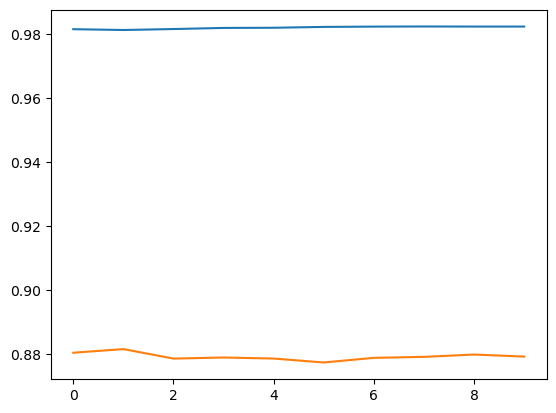

In [73]:
import matplotlib.pyplot as plt

# n_estimators

x_=[]
y_=[]
for i in range(100, 1001, 100):
    rfr=RandomForestRegressor(n_estimators=i, random_state=42).fit(x_train, y_train)
    x_.append(rfr.score(x_train, y_train))
    y_.append(rfr.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)
plt.show()

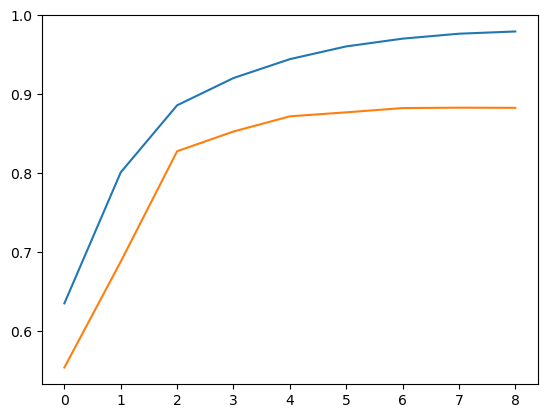

In [79]:
# max_depth
x_=[]
y_=[]
for i in range(1,10):
    rfr=RandomForestRegressor(max_depth=i, random_state=42).fit(x_train, y_train)
    x_.append(rfr.score(x_train, y_train))
    y_.append(rfr.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)
plt.show()

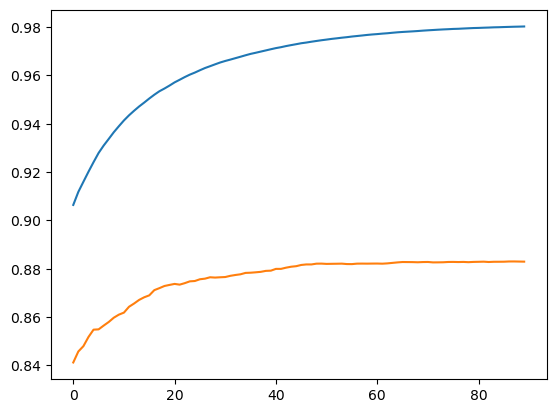

In [82]:
# max_leaf_nodes
x_=[]
y_=[]
for i in range(10,100):
    rfr=RandomForestRegressor(max_leaf_nodes=i, random_state=42).fit(x_train, y_train)
    x_.append(rfr.score(x_train, y_train))
    y_.append(rfr.score(x_test, y_test))
plt.plot(x_)
plt.plot(y_)
plt.show()

In [85]:
rfr=RandomForestRegressor(n_estimators=100, max_depth=6, max_leaf_nodes=70 ,random_state=42).fit(x_train, y_train)

print("훈  련 세트 점수:", rfr.score(x_train, y_train))
print("테스트 세트 점수:", rfr.score(x_test, y_test))

훈  련 세트 점수: 0.9603153414479881
테스트 세트 점수: 0.8791292834970806


In [86]:
from sklearn.linear_model import LinearRegression
md=LinearRegression().fit(x_train, y_train)
md.score(x_test, y_test)

0.7988908872869827

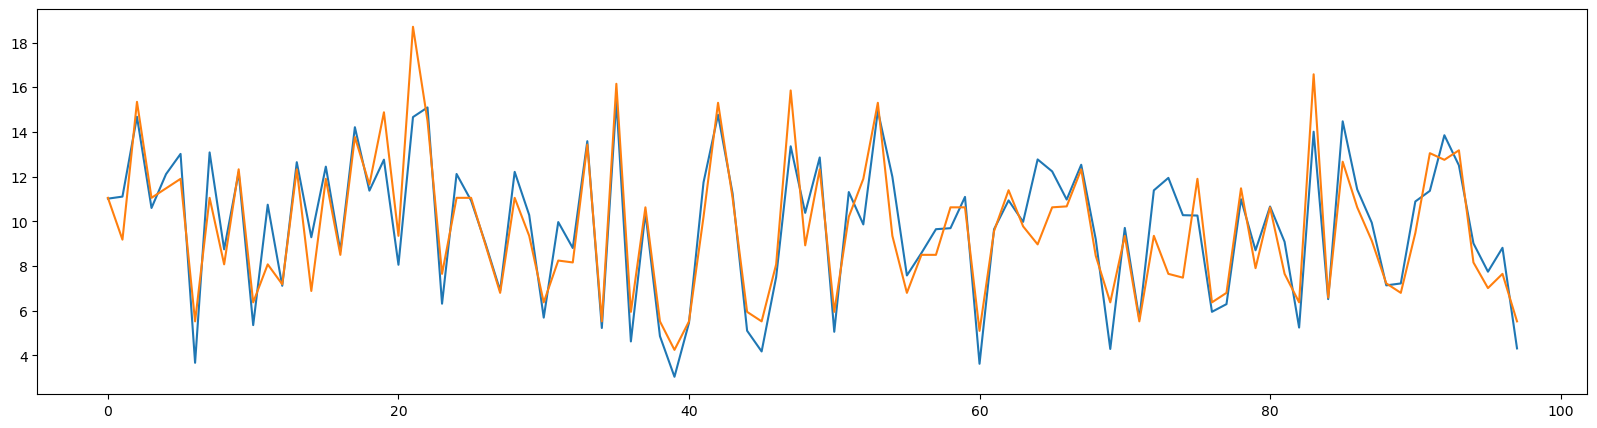

In [90]:
plt.figure(figsize=(20,5))
plt.plot(md.predict(x_test))
plt.plot(y_test)